# Exercice sur le paradoxe de Simpson

## Contexte

En 1972-1974, à Whickham, une ville du nord-est de l'Angleterre, située à environ 6,5 kilomètres au sud-ouest de Newcastle upon Tyne, un sondage d'un sixième des électeurs a été effectué afin d'éclairer des travaux sur les maladies thyroïdiennes et cardiaques (Tunbridge et al. 1977). Une suite de cette étude a été menée vingt ans plus tard (Vanderpump et al. 1995). Certains des résultats avaient trait au tabagisme et cherchaient à savoir si les individus étaient toujours en vie lors de la seconde étude. Par simplicité, nous nous restreindrons aux femmes et parmi celles-ci aux 1314 qui ont été catégorisées comme "fumant actuellement" ou "n'ayant jamais fumé". Il y avait relativement peu de femmes dans le sondage initial ayant fumé et ayant arrêté depuis (162) et très peu pour lesquelles l'information n'était pas disponible (18). La survie à 20 ans a été déterminée pour l'ensemble des femmes du premier sondage.



## Importation des libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns


## Importation du jeu de données

In [2]:
data_url = "https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/-/raw/master/module3/Practical_session/Subject6_smoking.csv"

In [3]:
raw_data = pd.read_csv(data_url)
raw_data

Smoker Status   Age
0       Yes  Alive  21.0
1       Yes  Alive  19.3
2        No   Dead  57.5
3        No  Alive  47.1
4       Yes  Alive  81.4
5        No  Alive  36.8
6        No  Alive  23.8
7       Yes   Dead  57.5
8       Yes  Alive  24.8
9       Yes  Alive  49.5
10      Yes  Alive  30.0
11       No   Dead  66.0
12      Yes  Alive  49.2
13       No  Alive  58.4
14       No   Dead  60.6
15       No  Alive  25.1
16       No  Alive  43.5
17       No  Alive  27.1
18       No  Alive  58.3
19      Yes  Alive  65.7
20       No   Dead  73.2
21      Yes  Alive  38.3
22       No  Alive  33.4
23      Yes   Dead  62.3
24       No  Alive  18.0
25       No  Alive  56.2
26      Yes  Alive  59.2
27       No  Alive  25.8
28       No   Dead  36.9
29       No  Alive  20.2
...     ...    ...   ...
1284    Yes   Dead  36.0
1285    Yes  Alive  48.3
1286     No  Alive  63.1
1287     No  Alive  60.8
1288    Yes   Dead  39.3
1289     No  Alive  36.7
1290     No  Alive  63.8
1291     No   Dead  71.3
1292     No  Alive  57.7
1293     No  Alive  63.2
1294     No  Alive  46.6
1295    Yes   Dead  82.4
1296    Yes  Alive  38.3
1297    Yes  Alive  32.7
1298     No  Alive  39.7
1299    Yes   Dead  60.0
1300     No   Dead  71.0
1301     No  Alive  20.5
1302     No  Alive  44.4
1303    Yes  Alive  31.2
1304    Yes  Alive  47.8
1305    Yes  Alive  60.9
1306     No   Dead  61.4
1307    Yes  Alive  43.0
1308     No  Alive  42.1
1309    Yes  Alive  35.9
1310     No  Alive  22.3
1311    Yes   Dead  62.1
1312     No   Dead  88.6
1313     No  Alive  39.1

[1314 rows x 3 columns]

In [4]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Smoker, Status, Age]
Index: []

Il n'y a pas de ligne contenant des données manquantes

In [5]:
raw_data['Status'] = pd.Categorical(raw_data.Status)

### Taux de mortalité: Non fumeuse VS Fumeuse

In [6]:
sm_st = pd.crosstab(raw_data['Smoker'],raw_data['Status'], margins = True)

In [7]:
sm_st['MortalityRate']=sm_st.Dead / sm_st.All
sm_st

Status  Alive  Dead   All  MortalityRate
Smoker                                  
No        502   230   732       0.314208
Yes       443   139   582       0.238832
All       945   369  1314       0.280822

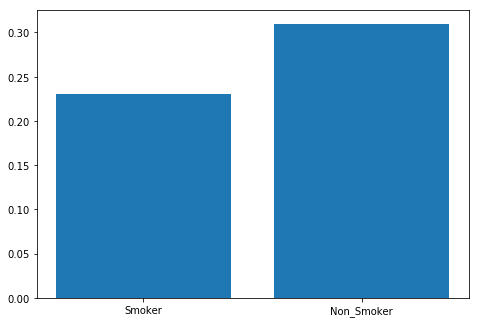

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Smoker','Non_Smoker']
students = [0.23,0.31]
ax.bar(langs,students)
plt.show()

Le taux de mortalité est plus élevé chez les femmes non fumeuses que les femmes fumeuses, ce qui semble surprenant.  
On peut regarder la significativité de ce résultat en faisant un test de comparaison des proportions de ces deux populations différentes (fumeuses et non fumeuses).


In [9]:
from statsmodels.stats.proportion import proportions_ztest
count = np.array([ sm_st.Dead.No,  sm_st.Dead.Yes])
nobs = np.array([sm_st.All.No, sm_st.All.Yes])
stat, pval = proportions_ztest(count, nobs)
pval > 0.05

False

La p-value est inférieur à 0.05, nous considérons donc que  la proportion de fumeuses est significativement différente de celle des non fumeuses.

### Taux de mortalité: Non fumeuse VS Fumeuse en fonction de la tranche d'âge

On considére maintenant les classes suivantes : 18-34 ans, 34-54 ans, 55-64 ans, plus de 65 ans afin de voir s'il y a des différences de taux de mortalité entre les fumeuses et les non-fumeuses.

In [10]:
bins= [18,34,54,64,200]
labels = ['18-34','35-54','55-64','65-Plus']
raw_data['AgeGroup'] = pd.cut(raw_data['Age'], bins=bins, labels=labels, right=False)
raw_data

Smoker Status   Age AgeGroup
0       Yes  Alive  21.0    18-34
1       Yes  Alive  19.3    18-34
2        No   Dead  57.5    55-64
3        No  Alive  47.1    35-54
4       Yes  Alive  81.4  65-Plus
5        No  Alive  36.8    35-54
6        No  Alive  23.8    18-34
7       Yes   Dead  57.5    55-64
8       Yes  Alive  24.8    18-34
9       Yes  Alive  49.5    35-54
10      Yes  Alive  30.0    18-34
11       No   Dead  66.0  65-Plus
12      Yes  Alive  49.2    35-54
13       No  Alive  58.4    55-64
14       No   Dead  60.6    55-64
15       No  Alive  25.1    18-34
16       No  Alive  43.5    35-54
17       No  Alive  27.1    18-34
18       No  Alive  58.3    55-64
19      Yes  Alive  65.7  65-Plus
20       No   Dead  73.2  65-Plus
21      Yes  Alive  38.3    35-54
22       No  Alive  33.4    18-34
23      Yes   Dead  62.3    55-64
24       No  Alive  18.0    18-34
25       No  Alive  56.2    55-64
26      Yes  Alive  59.2    55-64
27       No  Alive  25.8    18-34
28       No   Dead  36.9    35-54
29       No  Alive  20.2    18-34
...     ...    ...   ...      ...
1284    Yes   Dead  36.0    35-54
1285    Yes  Alive  48.3    35-54
1286     No  Alive  63.1    55-64
1287     No  Alive  60.8    55-64
1288    Yes   Dead  39.3    35-54
1289     No  Alive  36.7    35-54
1290     No  Alive  63.8    55-64
1291     No   Dead  71.3  65-Plus
1292     No  Alive  57.7    55-64
1293     No  Alive  63.2    55-64
1294     No  Alive  46.6    35-54
1295    Yes   Dead  82.4  65-Plus
1296    Yes  Alive  38.3    35-54
1297    Yes  Alive  32.7    18-34
1298     No  Alive  39.7    35-54
1299    Yes   Dead  60.0    55-64
1300     No   Dead  71.0  65-Plus
1301     No  Alive  20.5    18-34
1302     No  Alive  44.4    35-54
1303    Yes  Alive  31.2    18-34
1304    Yes  Alive  47.8    35-54
1305    Yes  Alive  60.9    55-64
1306     No   Dead  61.4    55-64
1307    Yes  Alive  43.0    35-54
1308     No  Alive  42.1    35-54
1309    Yes  Alive  35.9    35-54
1310     No  Alive  22.3    18-34
1311    Yes   Dead  62.1    55-64
1312     No   Dead  88.6  65-Plus
1313     No  Alive  39.1    35-54

[1314 rows x 4 columns]

In [11]:
sm_st_age = raw_data.groupby(['AgeGroup','Smoker','Status']).size().reset_index(name='counts')
sm_st_age

AgeGroup Smoker Status  counts
0     18-34     No  Alive     213
1     18-34     No   Dead       6
2     18-34    Yes  Alive     174
3     18-34    Yes   Dead       5
4     35-54     No  Alive     180
5     35-54     No   Dead      19
6     35-54    Yes  Alive     198
7     35-54    Yes   Dead      41
8     55-64     No  Alive      80
9     55-64     No   Dead      39
10    55-64    Yes  Alive      64
11    55-64    Yes   Dead      51
12  65-Plus     No  Alive      29
13  65-Plus     No   Dead     166
14  65-Plus    Yes  Alive       7
15  65-Plus    Yes   Dead      42

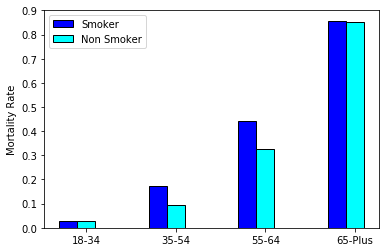

In [12]:
# width of the bars
barWidth = 0.2
 
# Choose the height of the blue bars - Smoker
bars1 = [5/(5+174), 41/(41+198), 51/(51+64) , 42/(42+7)]
 
# Choose the height of the cyan bars - Non Smoker
bars2 = [6/(6+213), 19/(19+180), 39/(39+80) , 166/(166+29)]
 

 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='Smoker')
 
# Create cyan bars
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black',  capsize=7, label='Non Smoker')
 
# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['18-34','35-54','55-64','65-Plus'])
plt.ylabel('Mortality Rate')
plt.legend()
 
# Show graphic
plt.show()

En considérant les catégories d'âge, il n'y a pas de différences entre le taux de mortalité des fumeuses et les non fumeuses pour les 18-34 ans et pour les 65-plus ans.  
En revanche pour les catégories 35-54 et 55-64, le taux de mortalité des fumeuses est plus élevé.  

### Regression logistique: Mortalité en fonction de l'âge

Afin d'éviter un biais induit par des regroupements en tranches d'âges arbitraires et non régulières, il est envisageable d'essayer de réaliser une régression logistique. Si on introduit une variable Death valant 1 ou 0 pour indiquer si l'individu est décédé durant la période de 20 ans, on peut étudier le modèle Death ~ Age pour étudier la probabilité de décès en fonction de l'âge selon que l'on considère le groupe des fumeuses ou des non fumeuses. 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


[4.63502546]
[[-0.0730934]]


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


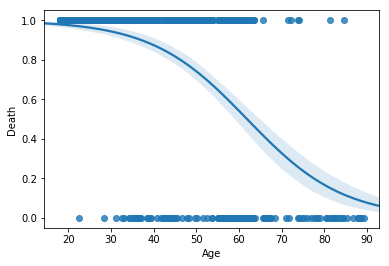

In [13]:
#Fumeuses
fum = raw_data.loc[raw_data.Smoker == "Yes"]

from sklearn.linear_model import LogisticRegression
fum['Death']= fum.Status.map({'Dead': 0, 'Alive': 1})
#clf = LogisticRegression(random_state=0).fit(list(raw_data.Death),list(raw_data.Age))
X_f = np.array(fum.Age).reshape(-1, 1)
y_f = np.array(fum.Death)
clf_f = LogisticRegression(random_state=0).fit(X_f,y_f)



# Check trained model intercept
print(clf_f.intercept_)

# Check trained model regression coefficients
print(clf_f.coef_)

# Make predictions
preds_f = clf_f.predict(X = X_f)

clf_f.score(X = X_f ,
                y = y_f)

sns.regplot(x='Age', y='Death', data=fum, logistic=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


[5.70698877]
[[-0.08999613]]


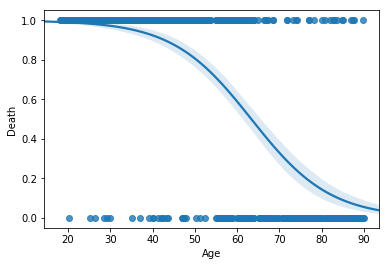

In [14]:
#Non Fumeuses
nfum = raw_data.loc[raw_data.Smoker == "No"]

nfum['Death']= nfum.Status.map({'Dead': 0, 'Alive': 1})
X_nf = np.array(nfum.Age).reshape(-1, 1)
y_nf = np.array(nfum.Death)
clf_nf = LogisticRegression(random_state=0).fit(X_nf,y_nf)



# Check trained model intercept
print(clf_nf.intercept_)

# Check trained model regression coefficients 
print(clf_nf.coef_)


# Make predictions
preds_nf = clf_f.predict(X = X_nf)

clf_nf.score(X = X_nf,
                y = y_nf)


sns.regplot(x='Age', y='Death', data=nfum, logistic=True)

Le coefficient de régression du modèle avec les fumeuses est supérieur à celui avec les non fumeuses; la mortalité des jeunes commencerait plus tôt chez les fumeuses. 
Ces régressions ne permettent pas de conclure sur la nocivité du tabagisme.

